# Importing Data

In [19]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0c6a18c356f947c3aa6a8b97444031dc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='5n1f4AlsuzvWNa7ix4yaz1-3j9-ThoZlXJhKrwVayw_2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0c6a18c356f947c3aa6a8b97444031dc.get_object(Bucket='viisemproject-donotdelete-pr-v2jj2svyclh816',Key='district_level_latest.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,0,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN


# Drop Unwanted Column

In [20]:
df.drop(['Migrated_Other' , 'Delta_Confirmed' , 'Delta_Active' , 'Delta_Recovered' , 'Delta_Deceased'],axis=1,inplace=True)

In [21]:
df.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,District_Notes,Last_Updated
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,NaN,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,District-wise numbers are out-dated as cumulat...,NaN
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,District-wise numbers are out-dated as cumulat...,NaN
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,NaN,NaN


In [22]:
df.drop(['Last_Updated'],axis=1,inplace=True)

In [23]:
df.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,District_Notes
0,0,UN,State Unassigned,UN_Unassigned,Unassigned,0,0,0,0,NaN
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,District-wise numbers are out-dated as cumulat...
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,District-wise numbers are out-dated as cumulat...
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,District-wise numbers are out-dated as cumulat...
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,NaN


In [24]:
df.tail()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,District_Notes
795,760,TG,Telangana,TG_Unknown,Unknown,457,-51654,51552,559,NaN
796,761,TR,Tripura,TR_Unknown,Unknown,0,0,0,0,NaN
797,762,UP,Uttar Pradesh,UP_Unknown,Unknown,0,0,0,0,NaN
798,763,UT,Uttarakhand,UT_Unknown,Unknown,0,0,0,0,NaN
799,764,WB,West Bengal,WB_Unknown,Unknown,0,0,0,0,NaN


In [25]:
df.describe()

,SlNo,Confirmed,Active,Recovered,Deceased
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,372.795000,2531.761250,757.375000,1721.730000,52.047500
std,229.978462,9943.527079,3441.593212,7780.589126,329.479664
min,0.000000,0.000000,-51654.000000,0.000000,0.000000
25%,172.750000,190.500000,48.750000,69.000000,0.000000
50%,372.500000,628.000000,210.500000,377.500000,4.000000
75%,572.250000,1615.000000,549.250000,988.750000,17.000000
max,766.000000,140743.000000,41121.000000,127124.000000,6648.000000


In [26]:
# creating copies of the given data
df = df.copy(deep = False)

In [27]:
df.shape

(800, 10)

In [28]:
df.size

8000

In [29]:
df.columns

Index(['SlNo', 'State_Code', 'State', 'District_Key', 'District', 'Confirmed',
       'Active', 'Recovered', 'Deceased', 'District_Notes'],
      dtype='object')

In [30]:
# Importing Libraries

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inspect the Data Frame

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SlNo            800 non-null    int64 
 1   State_Code      800 non-null    object
 2   State           800 non-null    object
 3   District_Key    800 non-null    object
 4   District        800 non-null    object
 5   Confirmed       800 non-null    int64 
 6   Active          800 non-null    int64 
 7   Recovered       800 non-null    int64 
 8   Deceased        800 non-null    int64 
 9   District_Notes  60 non-null     object
dtypes: int64(5), object(5)
memory usage: 62.6+ KB


# Inspect Null Values in each Column

In [33]:
round(df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100,2)

District_Notes    92.5
Deceased           0.0
Recovered          0.0
Active             0.0
Confirmed          0.0
District           0.0
District_Key       0.0
State              0.0
State_Code         0.0
SlNo               0.0
dtype: float64

# Inspect Null Values in each Row

In [34]:
df.isnull().sum(axis=1).sort_values(ascending=False)

799    1
263    1
285    1
284    1
283    1
      ..
574    0
575    0
576    0
577    0
603    0
Length: 800, dtype: int64

# Total Covid_19 Cases State Wise

In [35]:
df.groupby('State')['Confirmed'].sum()

State
Andaman and Nicobar Islands                   1123
Andhra Pradesh                              196789
Arunachal Pradesh                             1948
Assam                                        52818
Bihar                                        68148
Chandigarh                                    1327
Chhattisgarh                                 11020
Dadra and Nagar Haveli and Daman and Diu      1415
Delhi                                       141531
Goa                                           7614
Gujarat                                      67811
Haryana                                      39303
Himachal Pradesh                              3047
Jammu and Kashmir                            23454
Jharkhand                                    15756
Karnataka                                   158254
Kerala                                       30449
Ladakh                                        1595
Lakshadweep                                      0
Madhya Pradesh           

In [38]:
df.groupby('State')['Active'].sum()

State
Andaman and Nicobar Islands                    752
Andhra Pradesh                               82166
Arunachal Pradesh                              700
Assam                                        15431
Bihar                                        23939
Chandigarh                                     529
Chhattisgarh                                  2855
Dadra and Nagar Haveli and Daman and Diu       406
Delhi                                        10348
Goa                                           2095
Gujarat                                      14708
Haryana                                       6205
Himachal Pradesh                              1141
Jammu and Kashmir                             7310
Jharkhand                                     9017
Karnataka                                    75067
Kerala                                       11983
Ladakh                                         411
Lakshadweep                                      0
Madhya Pradesh           

In [41]:
df.groupby('State')['Recovered'].sum()

State
Andaman and Nicobar Islands                    355
Andhra Pradesh                              112870
Arunachal Pradesh                             1245
Assam                                        37225
Bihar                                        43820
Chandigarh                                     777
Chhattisgarh                                  8088
Dadra and Nagar Haveli and Daman and Diu       997
Delhi                                       127124
Goa                                           5453
Gujarat                                      50524
Haryana                                      32640
Himachal Pradesh                              1865
Jammu and Kashmir                            15708
Jharkhand                                     6594
Karnataka                                    80281
Kerala                                       18333
Ladakh                                        1177
Lakshadweep                                      0
Madhya Pradesh           

In [44]:
df.groupby('State')['Deceased'].sum()

State
Andaman and Nicobar Islands                    16
Andhra Pradesh                               1753
Arunachal Pradesh                               3
Assam                                         126
Bihar                                         388
Chandigarh                                     20
Chhattisgarh                                   77
Dadra and Nagar Haveli and Daman and Diu        2
Delhi                                        4059
Goa                                            66
Gujarat                                      2579
Haryana                                       458
Himachal Pradesh                               13
Jammu and Kashmir                             436
Jharkhand                                     145
Karnataka                                    2897
Kerala                                         98
Ladakh                                          7
Lakshadweep                                     0
Madhya Pradesh                              

In [53]:
df.columns

Index(['SlNo', 'State_Code', 'State', 'District_Key', 'District', 'Confirmed',
       'Active', 'Recovered', 'Deceased', 'District_Notes'],
      dtype='object')

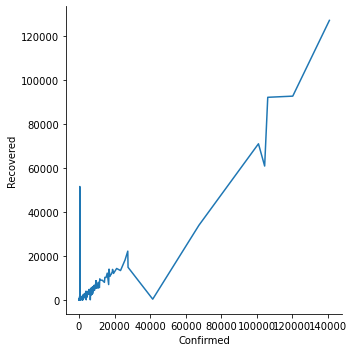

In [55]:
sns.relplot(x='Confirmed' , y='Recovered' , kind='line' , data=df)

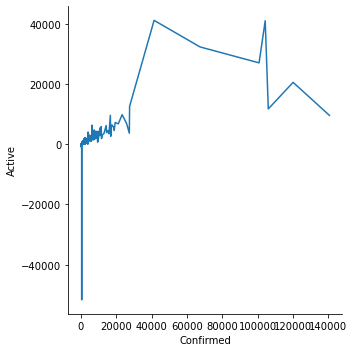

In [56]:
sns.relplot(x='Confirmed' , y='Active' , kind='line' , data=df)

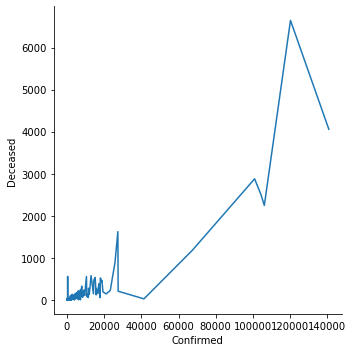

In [57]:
sns.relplot(x='Confirmed' , y='Deceased' , kind='line' , data=df)